##### Chapter5-Rating Random Forest

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as mtick
%matplotlib inline
from random import sample
import seaborn as sns
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [2]:
df_ratios = pd.read_csv('corporate_rating2.csv')
df_ratios

,Rating,Class,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
0,A,1,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,11/27/2015,Consumer Durables,0.945894,0.426395,0.099690,...,0.202716,0.437551,6.810673,9.809403,4.008012,0.049351,7.057088,15.565438,0.058638,3.906655
1,BBB,1,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,2/13/2014,Consumer Durables,1.033559,0.498234,0.203120,...,0.074155,0.541997,8.625473,17.402270,3.156783,0.048857,6.460618,15.914250,0.067239,4.002846
2,BBB,1,Whirlpool Corporation,WHR,Fitch Ratings,3/6/2015,Consumer Durables,0.963703,0.451505,0.122099,...,0.214529,0.513185,9.693487,13.103448,4.094575,0.044334,10.491970,18.888889,0.074426,3.483510
3,BBB,1,Whirlpool Corporation,WHR,Fitch Ratings,6/15/2012,Consumer Durables,1.019851,0.510402,0.176116,...,1.816667,-0.147170,-1.015625,14.440104,3.630950,-0.012858,4.080741,6.901042,0.028394,4.581150
4,BBB,1,Whirlpool Corporation,WHR,Standard & Poor's Ratings Services,10/24/2016,Consumer Durables,0.957844,0.495432,0.141608,...,0.166966,0.451372,7.135348,14.257556,4.012780,0.053770,8.293505,15.808147,0.058065,3.857790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024,BBB,1,"NVR, Inc.",NVR,Moody's Investors Service,9/5/2012,Capital Goods,11.757767,7.115059,7.057420,...,0.343500,0.953231,50.293155,230.194971,1.759461,0.086376,15.867701,52.760726,0.083018,15.758348
2025,BB,0,Kaiser Aluminum Corporation,KALU,Standard & Poor's Ratings Services,4/28/2016,Capital Goods,2.962788,1.294743,0.428234,...,0.363636,0.602645,5.563630,5.958956,1.614282,-0.267117,-4.729967,9.232021,0.114089,14.542373
2026,B,0,Cresud S.A.C.I.F. y A.,CRESY,Fitch Ratings,11/30/2012,Finance,0.883875,0.842553,0.233830,...,35.017544,0.926665,1.459801,1.056480,4.034952,0.265092,9.358311,1.575328,0.283634,2.300168
2027,B,0,Cresud S.A.C.I.F. y A.,CRESY,Fitch Ratings,6/15/2012,Finance,0.911713,0.748356,0.310640,...,0.331525,0.692804,0.744377,1.470201,3.825856,0.130692,22.440102,1.074441,0.217783,1.997608


In [3]:
# Display the structure
df_ratios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2029 entries, 0 to 2028
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Rating                              2029 non-null   object 
 1   Class                               2029 non-null   int64  
 2   Name                                2029 non-null   object 
 3   Symbol                              2029 non-null   object 
 4   Rating Agency Name                  2029 non-null   object 
 5   Date                                2029 non-null   object 
 6   Sector                              2029 non-null   object 
 7   currentRatio                        2029 non-null   float64
 8   quickRatio                          2029 non-null   float64
 9   cashRatio                           2029 non-null   float64
 10  daysOfSalesOutstanding              2029 non-null   float64
 11  netProfitMargin                     2029 no

In [4]:
df_ratios_1=df_ratios.iloc[:,7:32]
df_ratios_1.shape

(2029, 25)

In [5]:
print(df_ratios.isnull().sum())

Rating                                0
Class                                 0
Name                                  0
Symbol                                0
Rating Agency Name                    0
Date                                  0
Sector                                0
currentRatio                          0
quickRatio                            0
cashRatio                             0
daysOfSalesOutstanding                0
netProfitMargin                       0
pretaxProfitMargin                    0
grossProfitMargin                     0
operatingProfitMargin                 0
returnOnAssets                        0
returnOnCapitalEmployed               0
returnOnEquity                        0
assetTurnover                         0
fixedAssetTurnover                    0
debtEquityRatio                       0
debtRatio                             0
effectiveTaxRate                      0
freeCashFlowOperatingCashFlowRatio    0
freeCashFlowPerShare                  0


In [6]:
# Normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(df_ratios_1)
df_ratios_1 = scaler.transform(df_ratios_1)
df_ratios_1=pd.DataFrame(df_ratios_1,columns=['currentRatio','quickRatio','cashRatio','daysOfSalesOutstanding',
                                              'netProfitMargin', 'pretaxProfitMargin', 'grossProfitMargin',
                                              'operatingProfitMargin','returnOnAssets','returnOnCapital','returnOnEquity',
                                              'assetTurnover','fixedAssetTurnover','debtEquityRatio','debtRatio',
                                              'effectiveTaxRate','freeCashFlowOperatingCashFlowRatio','freeCashFlowPerShare',
                                              'cashPerShare','companyEquityMultiplier','ebitPerRevenue',
                                              'enterpriseValueMultiple','operatingCashFlowPerShare',
                                              'operatingCashFlowSalesRatio','payablesTurnover'])

In [7]:
print(df_ratios_1)

      currentRatio  quickRatio  cashRatio  daysOfSalesOutstanding  \
0        -0.058665   -0.067633  -0.158433               -0.065125   
1        -0.056675   -0.065451  -0.129566               -0.066297   
2        -0.058261   -0.066870  -0.152179               -0.063632   
3        -0.056986   -0.065082  -0.137103               -0.065809   
4        -0.058394   -0.065536  -0.146734               -0.064324   
...            ...         ...        ...                     ...   
2024      0.186827    0.135444   1.783407               -0.074822   
2025     -0.012870   -0.041268  -0.066739               -0.068183   
2026     -0.060074   -0.054997  -0.120995               -0.041872   
2027     -0.059442   -0.057857  -0.099558               -0.045460   
2028     -0.055507   -0.049416  -0.129463               -0.040959   

      netProfitMargin  pretaxProfitMargin  grossProfitMargin  \
0           -0.039746           -0.042541          -0.611864   
1           -0.038661           -0.042596  

In [8]:
df_ratios_1.shape

(2029, 25)

In [9]:
df_ratios_new = df_ratios_1.copy()

In [10]:
df_ratios_new.describe()

,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,returnOnCapital,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
count,2.029000e+03,2.029000e+03,2.029000e+03,2.029000e+03,2.029000e+03,2.029000e+03,2.029000e+03,2029.000000,2.029000e+03,2029.000000,...,2.029000e+03,2.029000e+03,2.029000e+03,2.029000e+03,2.029000e+03,2.029000e+03,2.029000e+03,2.029000e+03,2.029000e+03,2.029000e+03
mean,3.501936e-18,2.101161e-17,3.501936e-18,1.750968e-17,7.003871e-18,-3.501936e-18,-1.050581e-17,0.000000,-3.501936e-18,0.000000,...,-5.252903e-18,5.252903e-18,-3.501936e-18,-7.879355e-18,7.879355e-18,3.501936e-18,-1.400774e-17,-3.501936e-18,3.501936e-18,1.050581e-17
std,1.000247e+00,1.000247e+00,1.000247e+00,1.000247e+00,1.000247e+00,1.000247e+00,1.000247e+00,1.000247,1.000247e+00,1.000247,...,1.000247e+00,1.000247e+00,1.000247e+00,1.000247e+00,1.000247e+00,1.000247e+00,1.000247e+00,1.000247e+00,1.000247e+00,1.000247e+00
min,-1.013047e-01,-1.380604e-01,-2.400463e-01,-2.576360e-01,-1.684485e+01,-1.389050e+01,-2.913071e+01,-11.132823,-3.445937e+01,-37.063590,...,-9.535892e+00,-3.196519e+01,-6.813386e-02,-3.470382e-02,-2.924001e+01,-1.389222e+01,-7.180135e+00,-1.040403e-01,-3.033854e-01,-1.511270e-01
25%,-5.580366e-02,-6.227586e-02,-1.497977e-01,-6.991420e-02,-4.246349e-02,-4.517926e-02,-5.042888e-01,-0.048362,3.219624e-02,0.031494,...,-2.366948e-02,-3.637732e-02,-3.468360e-02,-3.453453e-02,-1.459012e-02,-4.557919e-02,-7.949117e-02,-3.669469e-02,-7.052741e-02,-4.717949e-02
50%,-4.623523e-02,-5.065194e-02,-1.032278e-01,-6.553594e-02,-3.524772e-02,-3.857584e-02,-1.584108e-01,-0.042723,3.221891e-02,0.031514,...,-9.160546e-03,6.190906e-02,-3.467189e-02,-3.451720e-02,-7.669242e-03,-3.898110e-02,-7.375129e-02,-3.668344e-02,-6.749002e-02,-4.249564e-02
75%,-3.094164e-02,-3.643858e-02,-1.184972e-02,-6.172428e-02,-2.699157e-02,-3.191896e-02,6.697262e-01,-0.036638,3.224623e-02,0.031540,...,-2.541366e-03,1.126053e-01,-3.465760e-02,-3.448124e-02,3.825382e-03,-3.207476e-02,-6.687522e-02,-3.666672e-02,-6.195345e-02,-3.759121e-02
max,3.909892e+01,3.451736e+01,3.495617e+01,2.600281e+01,3.269854e+01,3.442852e+01,4.197755e+00,36.499747,3.259821e-02,0.032521,...,4.055041e+01,9.006472e+00,3.913609e+01,3.908298e+01,2.924921e+01,3.443047e+01,2.099350e+01,3.624388e+01,3.527372e+01,2.672453e+01


### Split the dataset: Creating a Training Set and a Test Set

- 25% of the data will be used as the test set and 75% of the data would be used to train 

In [11]:
TT=pd.concat([df_ratios['Class'],df_ratios_new],axis=1)
TT.shape
TT.tail()

,Class,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
2024,1,0.186827,0.135444,1.783407,-0.074822,-0.036575,-0.038419,0.955929,-0.045400,0.032239,...,-0.005105,0.143242,-0.034344,-0.032666,-0.017874,-0.039086,-0.061287,-0.036411,-0.070059,-0.029318
2025,0,-0.012870,-0.041268,-0.066739,-0.068183,-0.073966,-0.077771,-0.569938,-0.074482,0.032017,...,-0.003204,0.050874,-0.034649,-0.034499,-0.019533,-0.078442,-0.100225,-0.036656,-0.068463,-0.030920
2026,0,-0.060074,-0.054997,-0.120995,-0.041872,-0.047159,-0.048010,-0.216267,-0.035814,0.032178,...,3.268359,0.136242,-0.034676,-0.034539,0.008129,-0.019189,-0.073593,-0.036699,-0.059759,-0.047055
2027,0,-0.059442,-0.057857,-0.099558,-0.045460,-0.031518,-0.033485,-0.158141,-0.026830,0.032198,...,-0.006235,0.074628,-0.034681,-0.034535,0.005740,-0.034153,-0.048863,-0.036702,-0.063140,-0.047454
2028,0,-0.055507,-0.049416,-0.129463,-0.040959,-0.084191,-0.083265,-0.192994,-0.033853,0.032148,...,-0.012328,0.182295,-0.034669,-0.034497,0.007035,-0.014969,-0.073128,-0.036695,-0.061352,-0.047628


In [12]:
Train, Test = train_test_split(TT,
                               test_size=0.25,
                               random_state=0)

X_train, y_train = Train.iloc[:,1:26], Train.iloc[:,0] ### choose the 25 features
X_test, y_test = Test.iloc[:,1:26], Test.iloc[:,0]

In [13]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1521, 25), (1521,), (508, 25), (508,))

## Random Forest


In [14]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators=500, random_state=1, max_features="sqrt", max_depth=34)
### default n_estimators/trees = 100; default criterion = 'gini' 
### max_features default case is "sqrt"; unlike DecisionTree Classifier where default case = "none"
### If max_depth=None, then nodes are expanded until all leaves are pure or until all leaves contain less than 
###   min_samples_split samples -- usu 2
### bootsrapping - bagging, default=true
### oob_scorebool, default=False -- Whether to use out-of-bag samples to estimate the generalization score. 
###    Only available if bootstrap=True.
RF_model.fit(X_train,y_train)

y_pred_RF = RF_model.predict(X_test)
Accuracy_RF = metrics.accuracy_score(y_test, y_pred_RF)
print("RF Accuracy:",Accuracy_RF)

RF Accuracy: 0.7933070866141733


In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_RF)
print(confusion_matrix)

[[153  62]
 [ 43 250]]


In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       0.78      0.71      0.74       215
           1       0.80      0.85      0.83       293

    accuracy                           0.79       508
   macro avg       0.79      0.78      0.79       508
weighted avg       0.79      0.79      0.79       508



In [17]:
###       Assuming your target is (0,1), then the classifier would output a probability matrix of dimension (N,2). 
###       The first index refers to the probability that the data belong to class 0, and the second refers to the probability 
###           hat the data belong to class 1. Each row sums to 1.
### "RF_model.predict_proba(X_test)[:,1]" will print a single array of 508 numbers - the second column or the predicted prob 
###    of test cases being 1.
### "RF_model.predict_proba(X_test)" will print array([[0.242, 0.758], [0.134, 0.866], ..... for 508 pairs

In [18]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
preds_RF = RF_model.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = metrics.roc_curve(y_test, preds_RF)  
    ### matches y_test of 1's and 0's versus pred prob of 1's for each of the 508 test cases
    ###    sklearn.metrics.roc_curve(y_true, y_score,...) requires y_true as 0,1 input and y_score as prob inputs
    ###    this metrics.roc_curve returns fpr, tpr, thresholds (Decreasing thresholds used to compute fpr and tpr)
roc_auc_RF = metrics.auc(fpr, tpr)
    ### sklearn.metrics.auc(fpr,tpr) returns AUC using trapezoidal rule
roc_auc_RF

0.8867529168981665

In [19]:
print(preds_RF)

[0.762 0.868 0.488 0.502 0.98  0.886 0.838 0.72  0.634 0.816 0.594 0.814
 0.714 0.796 0.778 0.504 0.246 0.876 0.35  0.142 0.63  0.956 0.37  0.962
 0.518 0.634 0.752 0.76  0.204 0.228 0.798 0.36  0.358 0.736 0.64  0.158
 0.866 0.14  0.654 0.878 0.894 0.872 0.288 0.21  0.894 0.162 0.944 0.736
 0.674 0.574 0.832 0.938 0.798 0.642 0.23  0.682 0.538 0.716 0.884 0.55
 0.87  0.09  0.722 0.438 0.154 0.596 0.396 0.268 0.938 0.922 0.468 0.334
 0.836 0.966 0.096 0.386 0.792 0.462 0.846 0.872 0.968 0.046 0.942 0.774
 0.656 0.782 0.948 0.688 0.316 0.586 0.768 0.148 0.594 0.052 0.502 0.088
 0.326 0.24  0.938 0.822 0.766 0.29  0.87  0.546 0.78  0.738 0.29  0.846
 0.948 0.838 0.826 0.884 0.764 0.754 0.234 0.646 0.912 0.638 0.696 0.936
 0.684 0.514 0.334 0.154 0.832 0.886 0.248 0.112 0.568 0.636 0.732 0.454
 0.77  0.498 0.758 0.302 0.982 0.584 0.642 0.724 0.564 0.718 0.984 0.966
 0.678 0.78  0.158 0.744 0.808 0.974 0.202 0.908 0.352 0.378 0.27  0.3
 0.32  0.084 0.47  0.226 0.078 0.468 0.336 0.252 0.704

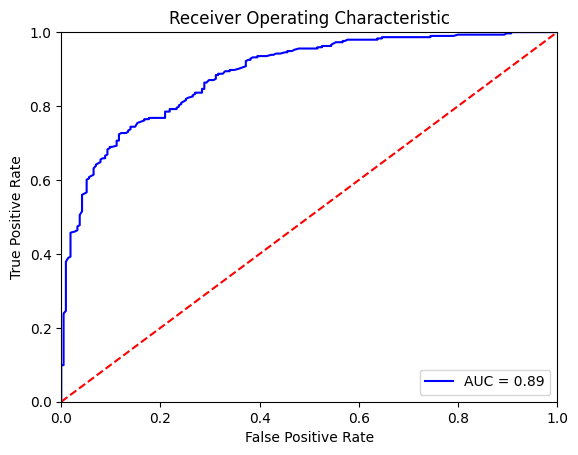

In [20]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_RF)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [21]:
import time
import numpy as np

start_time = time.time()
importances = RF_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in RF_model.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")
### importances.shape is (25,)

Elapsed time to compute the importances: 0.285 seconds


In [22]:
RF_model.feature_importances_  ### they sum to one

array([0.03530672, 0.03199011, 0.04189501, 0.02766383, 0.05602617,
       0.04348862, 0.02527928, 0.03140797, 0.06070739, 0.05757392,
       0.05515646, 0.02485091, 0.03359885, 0.03008319, 0.03606544,
       0.03737014, 0.03410918, 0.03182245, 0.03024261, 0.03077731,
       0.05328821, 0.03565967, 0.0806881 , 0.04744518, 0.02750331])

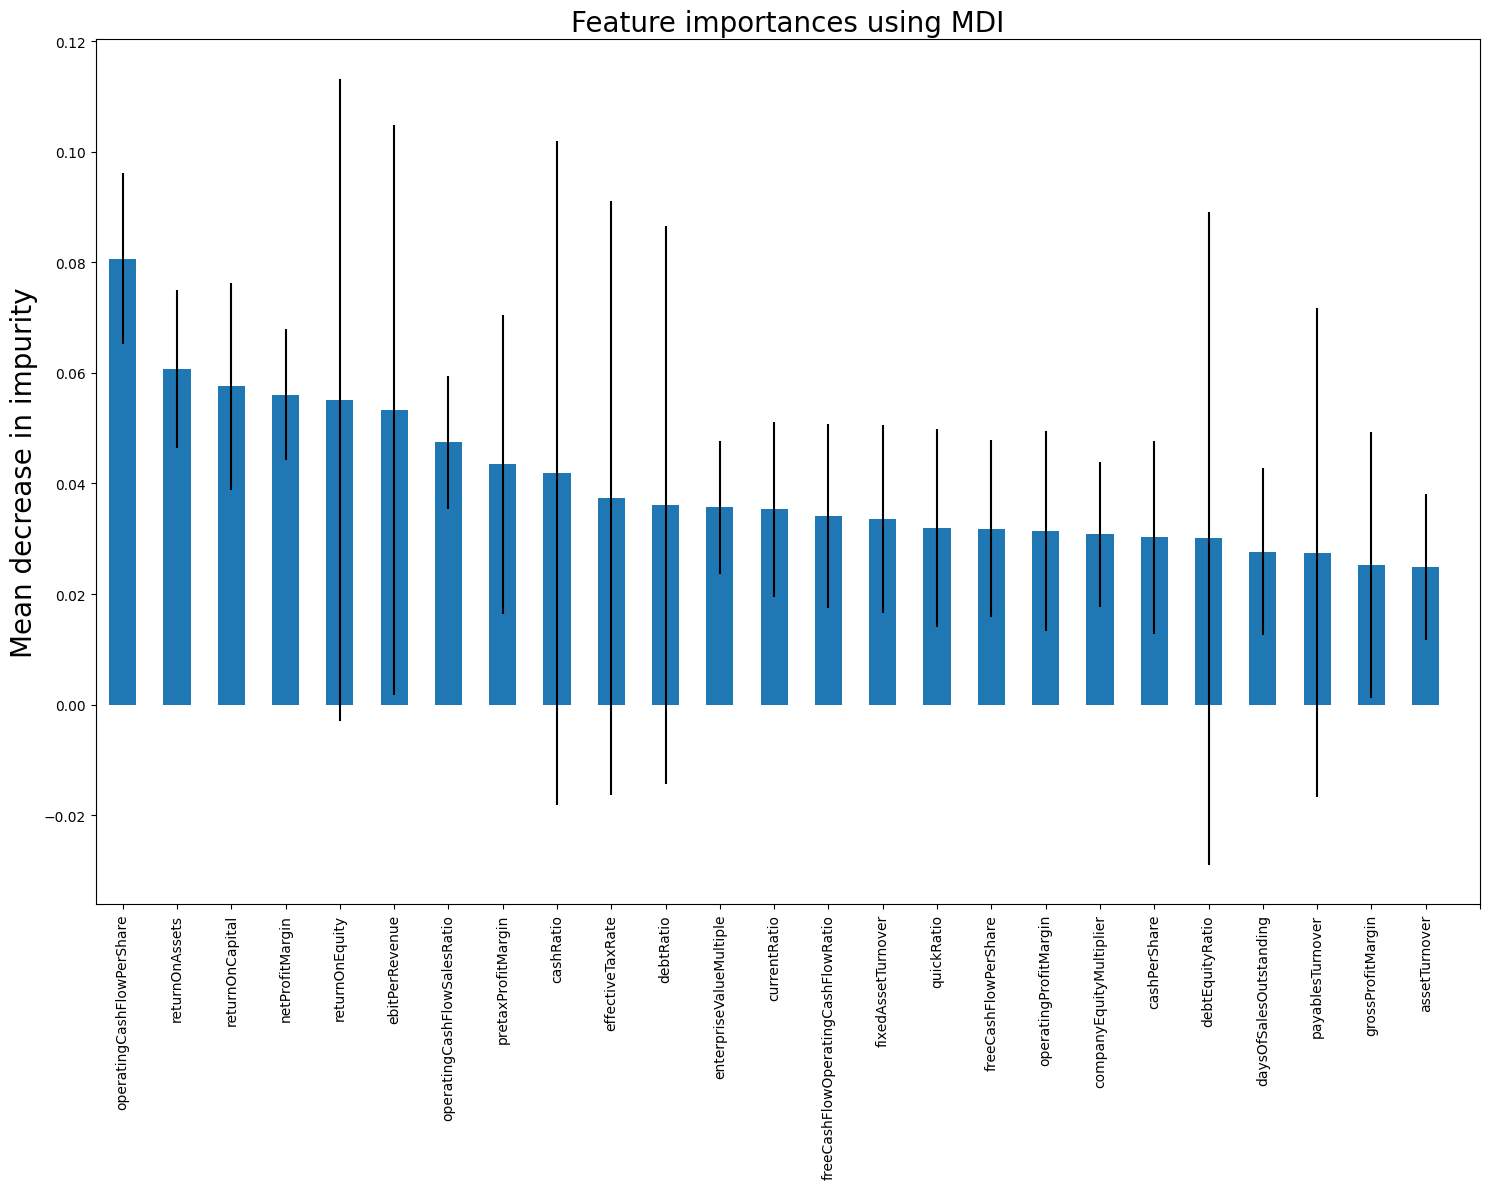

In [23]:
import pandas as pd

forest_importances = pd.Series(importances, index=X_train.columns)
forest_importances.sort_values(ascending=False,inplace=True)

fig, ax = plt.subplots(figsize=(15,12))
forest_importances.plot.bar(yerr=std, ax=ax) 
### thin line indicates 1 std err from the mean either way -- doesn't mean mean decrease is neg
ax.set_title("Feature importances using MDI",fontsize=20)  ### MDI is mean decrease in impurity 
ax.set_ylabel("Mean decrease in impurity",fontsize=20)
ax.set(xticks=([ 0, 1, 2, 3, 4, 5, 6, 7, 8, 9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,
 24,25]))
### define own x-ticks to avoid clutter, entry must be a list
fig.tight_layout()

### Note: Negative feature importance value means that feature makes the loss go up. 
### either model is underfitting with not enough iteration and not enough splitting use of feature or feature should be removed

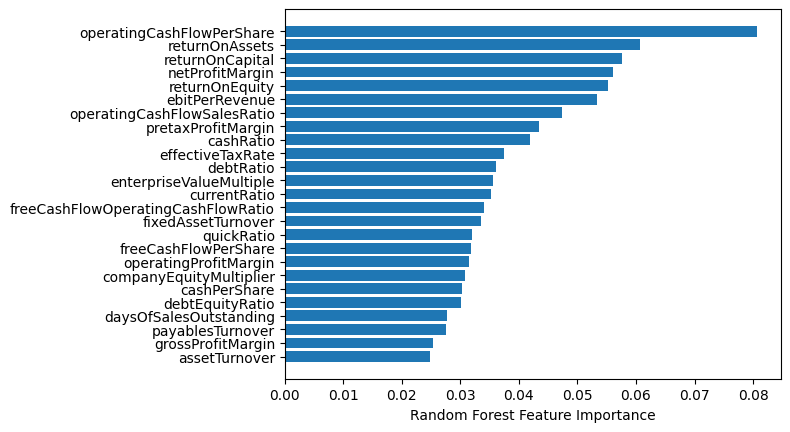

<Figure size 1600x1200 with 0 Axes>

In [24]:
### another representation
sorted_idx = RF_model.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx],RF_model.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.figure(figsize=(20, 15), dpi=80)
fig.tight_layout()

## Logistic Regression

In [25]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=1, 
                        multi_class='multinomial',
                        solver='newton-cg')
LR = LR.fit(X_train, y_train)

y_pred_LR = LR.predict(X_test)
Accuracy_LR = metrics.accuracy_score(y_test, y_pred_LR)
print("LR Accuracy:",Accuracy_LR)

LR Accuracy: 0.6476377952755905


In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_LR)
print(confusion_matrix)

[[ 70 145]
 [ 34 259]]


In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

           0       0.67      0.33      0.44       215
           1       0.64      0.88      0.74       293

    accuracy                           0.65       508
   macro avg       0.66      0.60      0.59       508
weighted avg       0.65      0.65      0.61       508



In [28]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
preds_LR = LR.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = metrics.roc_curve(y_test, preds_LR)  
    ### matches y_test of 1's and 0's versus pred prob of 1's for each of the 508 test cases
    ###    sklearn.metrics.roc_curve(y_true, y_score,...) requires y_true as 0,1 input and y_score as prob inputs
    ###    this metrics.roc_curve returns fpr, tpr, thresholds (Decreasing thresholds used to compute fpr and tpr)
roc_auc_LR = metrics.auc(fpr, tpr)
    ### sklearn.metrics.auc(fpr,tpr) returns AUC using trapezoidal rule
roc_auc_LR

0.6683070084927376

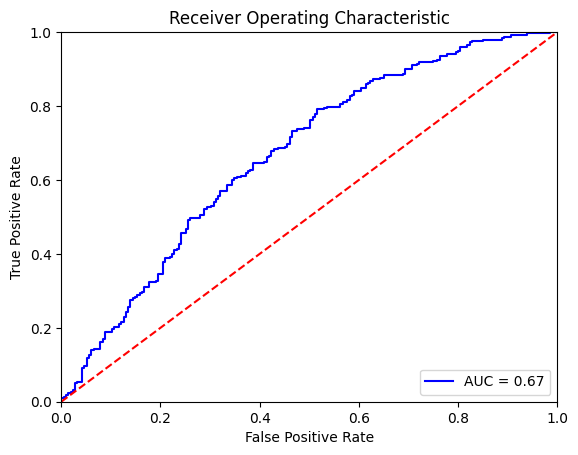

In [29]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_LR)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Making comparison

In [30]:
AUC_list = [roc_auc_RF, roc_auc_LR]
model_list = ['Random Forest', 'Logistic Regression']
df_AUC= pd.DataFrame({'Model': model_list, 'AUC': AUC_list})
df_AUC

,Model,AUC
0,Random Forest,0.886753
1,Logistic Regression,0.668307


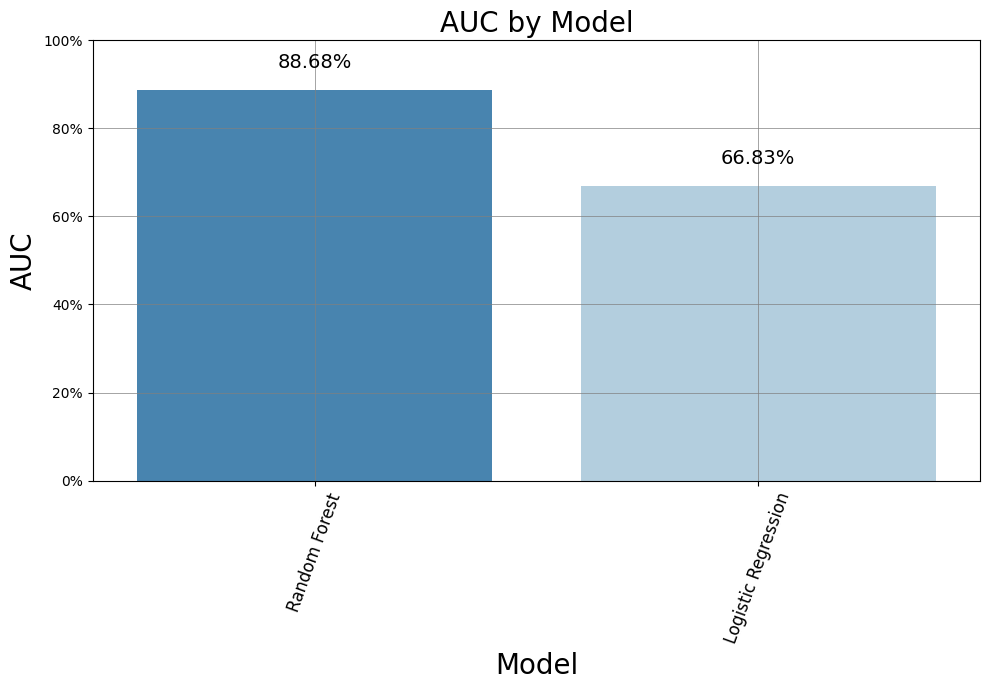

In [31]:
order = list(df_AUC.sort_values('AUC', ascending=False).Model)
df_AUC = df_AUC.sort_values('AUC', ascending=False).reset_index().drop(['index'], axis=1)

plt.figure(figsize=(10,7))
# make barplot and sort bars
x = sns.barplot(x='Model', y="AUC", 
                data=df_AUC, 
                order = order, 
                palette="Blues_r")

plt.xlabel("Model", fontsize=20)
plt.ylabel("AUC", fontsize=20)
plt.title("AUC by Model", fontsize=20)
plt.grid(linestyle='-', linewidth='0.5', color='grey')
plt.xticks(rotation=70, fontsize=12)
plt.ylim(0,1)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

for i in range(len(model_list)):
    plt.text(x = i, y = df_AUC.loc[i, 'AUC'] + 0.05, 
             s = str(round((df_AUC.loc[i, 'AUC'])*100, 2))+'%', 
             fontsize = 14, 
             color='black',
             horizontalalignment='center')

plt.tight_layout()
